<a href="https://colab.research.google.com/github/Nishant141/Data-Science-auth-python--22/blob/main/Keras_Syntax_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/fake_reg.txt')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


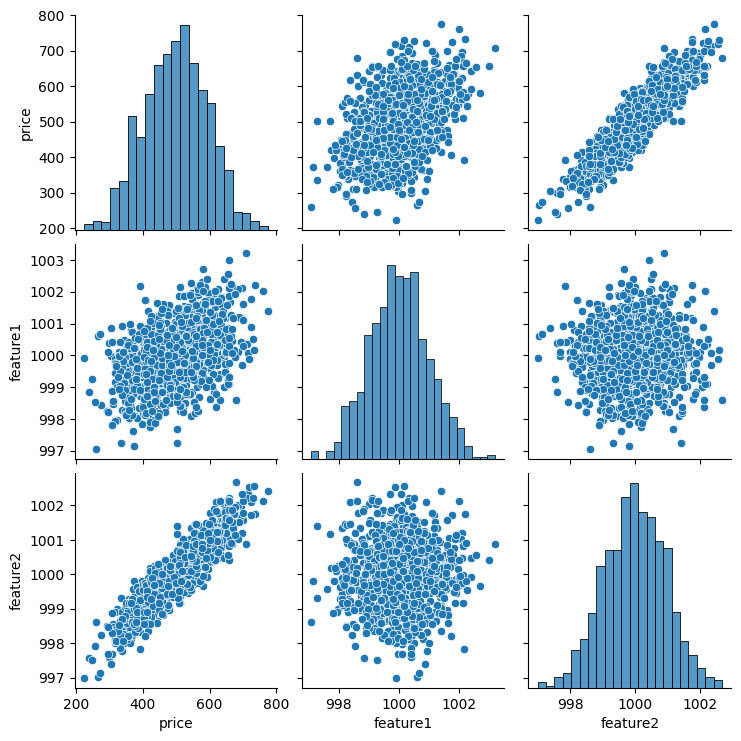

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#We need .values because it's best to pass in numpy arrays due to how tensorflow works
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Scale data to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
#Perform transformation
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [ ]:
#Add multiple layers into sequential with the number of neurons needed
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=400)

Epoch 1/400
22/22 [==============================] - 1s 3ms/step - loss: 256690.8594
Epoch 2/400
22/22 [==============================] - 0s 3ms/step - loss: 256620.6875
Epoch 3/400
22/22 [==============================] - 0s 3ms/step - loss: 256542.7812
Epoch 4/400
22/22 [==============================] - 0s 3ms/step - loss: 256452.3438
Epoch 5/400
22/22 [==============================] - 0s 3ms/step - loss: 256345.7344
Epoch 6/400
22/22 [==============================] - 0s 3ms/step - loss: 256218.8594
Epoch 7/400
22/22 [==============================] - 0s 3ms/step - loss: 256067.4219
Epoch 8/400
22/22 [==============================] - 0s 3ms/step - loss: 255887.0469
Epoch 9/400
22/22 [==============================] - 0s 2ms/step - loss: 255672.0156
Epoch 10/400
22/22 [==============================] - 0s 3ms/step - loss: 255415.3906
Epoch 11/400
22/22 [==============================] - 0s 2ms/step - loss: 255103.5156
Epoch 12/400
22/22 [==============================] - 0s 4ms/st

In [ ]:
#Grab losses and stick into a dataframe
loss_df = pd.DataFrame(model.history.history)

<Axes: >

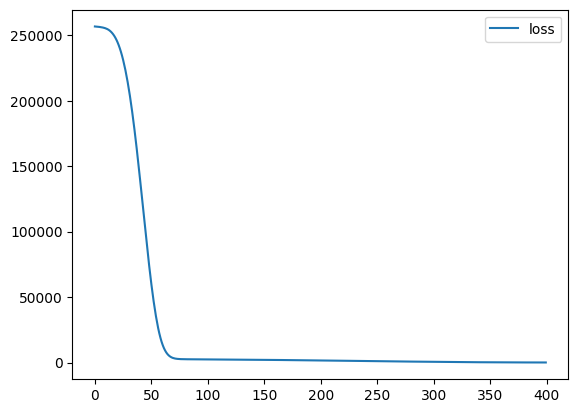

In [ ]:
#Plot out of the losses
#I.E. show how the model continually improves until no more improvement is possible
loss_df.plot()

In [ ]:
#Evaluate MSE for test vs training set
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [ ]:
training_score

44.003108978271484

In [ ]:
test_score

42.91973114013672

In [ ]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
#Put in a series
test_predictions = pd.Series(test_predictions.reshape(300,))

In [ ]:
#Concatenate into one dataframe
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions], axis=1)

pred_df.columns = ['Test True Y', 'Model Predictions']

<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

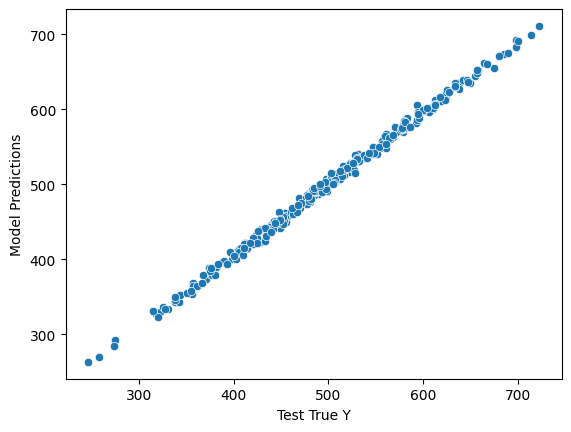

In [ ]:
#Compare Correlation of Test/Train
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
                            #MSE

5.341169133946529

In [ ]:
df.describe()


,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [ ]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])**0.5

6.551315412033811

In [ ]:
new_gem = [[998, 1000]]

In [ ]:
 new_gem = scaler.transform(new_gem)

In [ ]:
model.predict(new_gem)

1/1 [==============================] - 0s 59ms/step


array([[423.953]], dtype=float32)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('my_gem_model.h5')

In [ ]:
later_model = load_model('my_gem_model.h5')

In [ ]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 99ms/step


array([[423.953]], dtype=float32)